In [24]:
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.text2uri import standardized_uri

### ConceptNet API 

* [Github](https://github.com/commonsense/conceptnet5/wiki/API)
* [Web API version - conceptnet.io](https://conceptnet.io/)
* [ConceptNet Documentation](http://api.conceptnet.io/docs)
    * [Relationship Types](https://github.com/commonsense/conceptnet5/wiki/Relations)

#### Quickstart example - conceptnet5 library

```python
>>> from conceptnet5.db.query import AssertionFinder
>>> cnfinder = AssertionFinder()
>>> cnfinder.lookup('/c/en/example')
[... lots of edges ...]
>>> cnfinder.query({'node': '/c/en/example'})
[... the same edges ...]
```

In [25]:
#  Test using manual input word
INPUT_WORD = 'money'
obj = requests.get(f'http://api.conceptnet.io/c/en/{INPUT_WORD}?offset=0&limit=500&language=en').json()
for k in obj.keys():
    print(f'{k}: {len(obj[k])}')

print('\n\n')
print('@context: ', obj['@context']) # raw JSON message
print('@id: ', obj['@id'])
print('view: ', obj['view'])
print('First Edge Information: \n', json.dumps(obj['edges'][0], indent=4))

@context: 1
@id: 11
edges: 500
version: 5
view: 6



@context:  ['http://api.conceptnet.io/ld/conceptnet5.7/context.ld.json']
@id:  /c/en/money
view:  {'@id': '/c/en/money?offset=0&limit=500', '@type': 'PartialCollectionView', 'comment': "There are more results. Follow the 'nextPage' link for more.", 'firstPage': '/c/en/money?offset=0&limit=500', 'nextPage': '/c/en/money?offset=500&limit=500', 'paginatedProperty': 'edges'}
First Edge Information: 
 {
    "@id": "/a/[/r/RelatedTo/,/c/en/bank/,/c/en/money/]",
    "@type": "Edge",
    "dataset": "/d/verbosity",
    "end": {
        "@id": "/c/en/money",
        "@type": "Node",
        "label": "money",
        "language": "en",
        "term": "/c/en/money"
    },
    "license": "cc:by/4.0",
    "rel": {
        "@id": "/r/RelatedTo",
        "@type": "Relation",
        "label": "RelatedTo"
    },
    "sources": [
        {
            "@id": "/and/[/s/process/split_words/,/s/resource/verbosity/]",
            "@type": "Source",
       

### Threshold Analysis

Goal: To determine how to select the meaningful nodes

In [47]:
def plot_edge_hist(input_word:str):
    obj = requests.get(f'http://api.conceptnet.io/c/en/{input_word}?offset=0&limit=500&language=en').json()

    edge_weights = [obj['edges'][edge]['weight'] for edge in range(len(obj['edges']))]
    df = pd.DataFrame(edge_weights, columns=['edge_weights'])
    sns.histplot(data=df, x="edge_weights", bins=50)
    num_edges = len(obj['edges'])
    mean_weight = sum(edge_weights)/len(edge_weights)
    plt.axvline(mean_weight, c='red')
    plt.title(f'Histogram of Edge Weights for node "{input_word}" (# of edges: {num_edges})\nMean Weight={mean_weight}')
    plt.show()

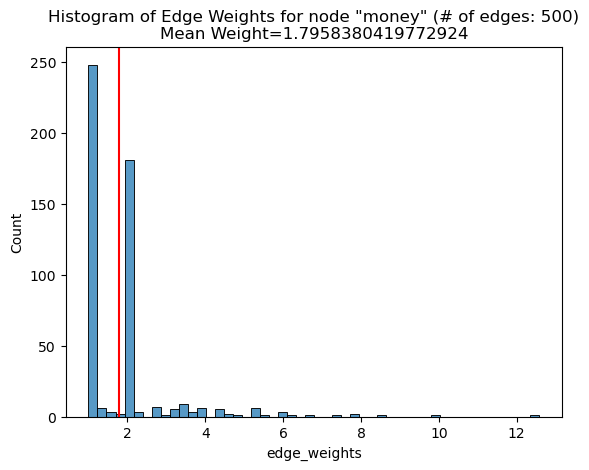

In [48]:
plot_edge_hist('money')

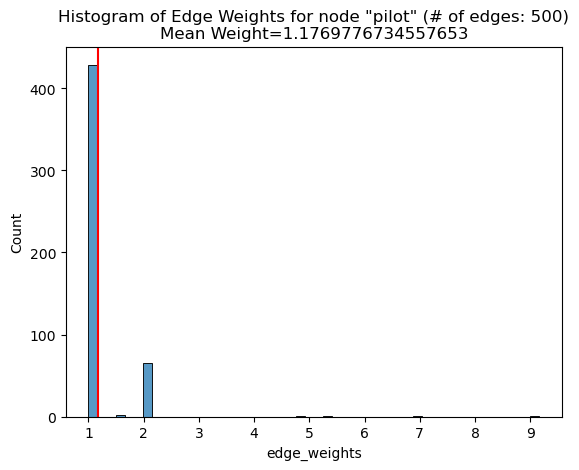

In [49]:
plot_edge_hist('pilot')

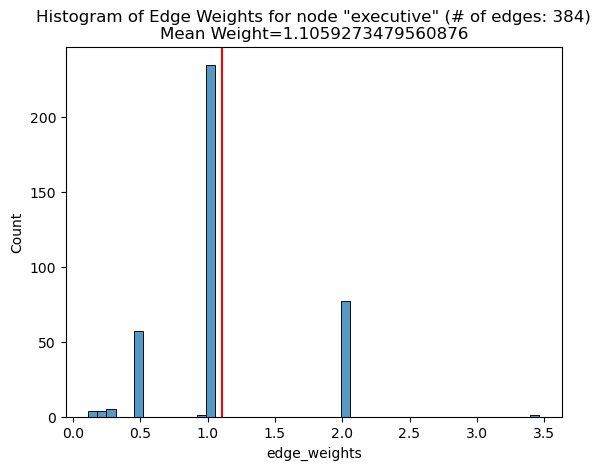

In [50]:
plot_edge_hist('executive')

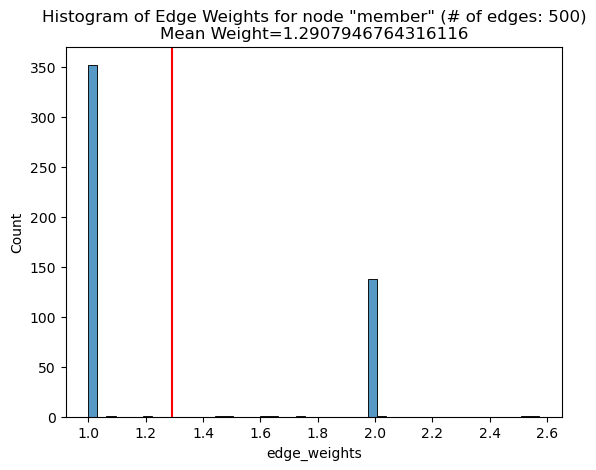

In [51]:
plot_edge_hist('member')

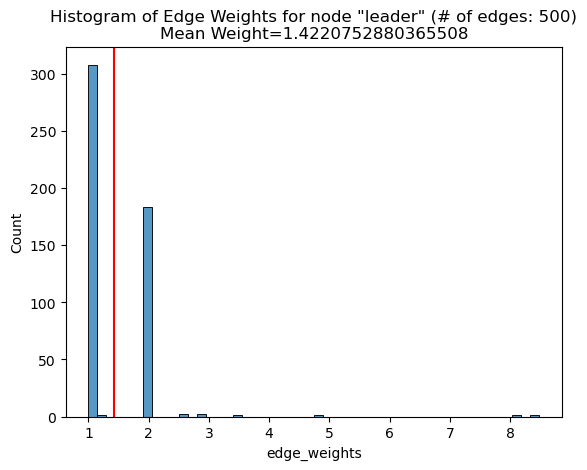

In [52]:
plot_edge_hist('leader')